In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2023.

Read the data for January. How many columns are there?

* 16
* 17
* 18
* **19**



In [14]:
df_taxi_01 = pd.read_parquet('data/yellow_tripdata_2023-01.parquet') 
df_taxi_01.shape

(3066766, 19)



## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 32.59
* **42.59**
* 52.59
* 62.59


In [15]:
df_taxi_01['trip_duration'] = (df_taxi_01['tpep_dropoff_datetime'] - df_taxi_01['tpep_pickup_datetime']).apply(lambda x: x.total_seconds()/60)
df_taxi_01['trip_duration'].head()

0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: trip_duration, dtype: float64

In [16]:
print('std:' ,np.std(df_taxi_01['trip_duration']))

std: 42.59434429744777




## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* **98%**



In [17]:
outliers = (df_taxi_01['trip_duration'] >= 1) & (df_taxi_01['trip_duration'] <= 60)
print( 'fraction of outliers removed:', (outliers.sum()/len(df_taxi_01))*100)
df_taxi_01 = df_taxi_01[outliers].copy()

fraction of outliers removed: 98.1220282212598



## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will 
  label encode them)
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* **515**
* 715



In [6]:
categorical  = ['PULocationID', 'DOLocationID']
df_taxi_01[categorical] = df_taxi_01[categorical].astype(str)

train_dict = df_taxi_01[categorical].to_dict(orient= 'records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [8]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 3.64
* **7.64**
* 11.64
* 16.64


In [9]:
Y_train = df_taxi_01['trip_duration'].values

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_Pred =lr.predict(X_train)

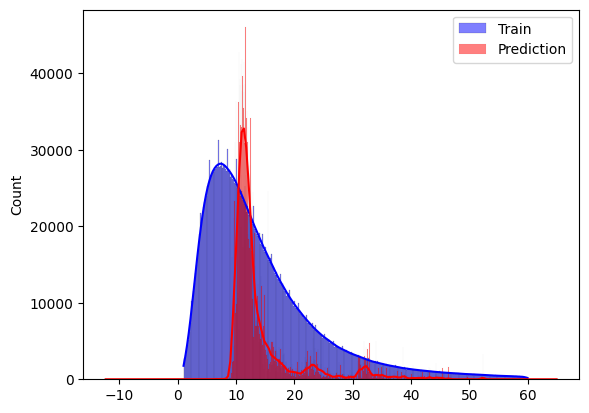


 rmse train set: 7.649261931416412


In [19]:
# Plotting the distributions
sns.histplot(Y_train, color='blue', label='Train', kde=True)
sns.histplot(Y_Pred, color='red', label='Prediction', kde=True)

plt.legend()
plt.show()

print('\n rmse train set:', np.sqrt(mean_squared_error(Y_train, Y_Pred)))



## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023). 

What's the RMSE on validation?

* 3.81
* **7.81**
* 11.81
* 16.81

In [22]:
df_taxi_02 = pd.read_parquet('data/yellow_tripdata_2023-02.parquet') 

# create trip dutarion feature
df_taxi_02['trip_duration'] = (df_taxi_02['tpep_dropoff_datetime'] - df_taxi_02['tpep_pickup_datetime']).apply(lambda x: x.total_seconds()/60)

# handle outliears
outliers = (df_taxi_02['trip_duration'] >= 1) & (df_taxi_02['trip_duration'] <= 60)
print( 'fraction of outliers removed:', (outliers.sum()/len(df_taxi_02))*100)
df_taxi_02 = df_taxi_02[outliers].copy()

# one hot encode
categorical  = ['PULocationID', 'DOLocationID']
df_taxi_02[categorical] = df_taxi_02[categorical].astype(str)

val_dict = df_taxi_02[categorical].to_dict(orient= 'records')
dv = DictVectorizer()
X_val = dv.fit_transform(val_dict)

fraction of outliers removed: 98.00944077722545


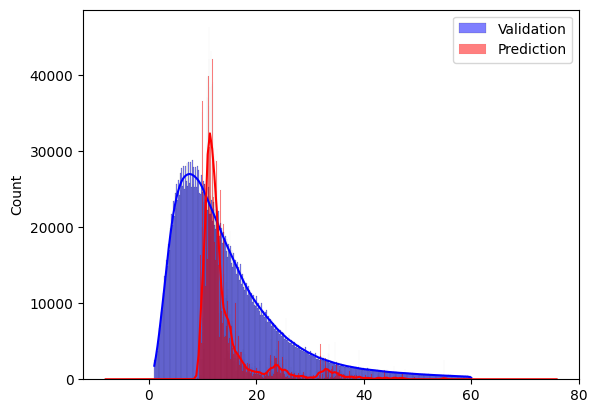


 rmse val set: 7.778948598551475


In [24]:
Y_val = df_taxi_02['trip_duration'].values

lr = LinearRegression()
lr.fit(X_val, Y_val)
Y_Pred =lr.predict(X_val)


# Plotting the distributions
sns.histplot(Y_val, color='blue', label='Validation', kde=True)
sns.histplot(Y_Pred, color='red', label='Prediction', kde=True)

plt.legend()
plt.show()

print('\n rmse val set:', np.sqrt(mean_squared_error(Y_val, Y_Pred)))